In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
os.chdir(r'C:\Users\PRATHMESH\OneDrive\Desktop\3ri\credit card')

In [3]:
df=pd.read_csv('Salary_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [7]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
df=df[['YearsExperience', 'Salary']]

In [9]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [10]:
df['YearsExperience']

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

Text(0, 0.5, 'Salary')

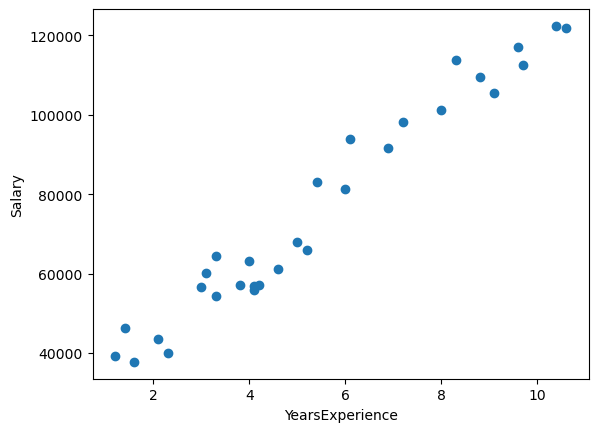

In [11]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [12]:
x=df[['YearsExperience']]
y=df[['Salary']]
    

In [13]:
x.shape,y.shape

((30, 1), (30, 1))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=6)

In [16]:
x_train.shape,x_test.shape

((21, 1), (9, 1))

In [17]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [23]:
x_train=scaler.fit_transform(x_train)

In [24]:
x_test=scaler.transform(x_test)

Text(0, 0.5, 'Salary')

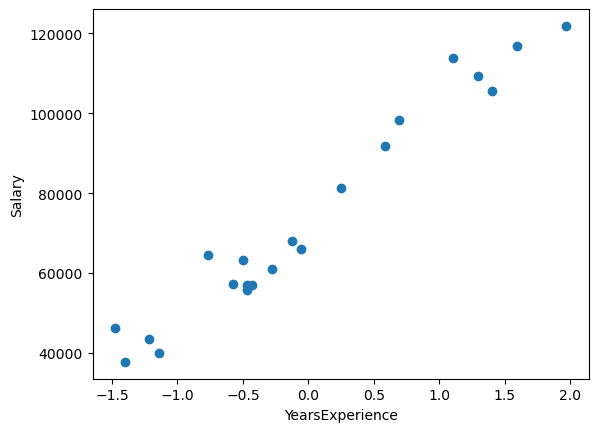

In [26]:
plt.scatter(x_train,y_train)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [28]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Salary')

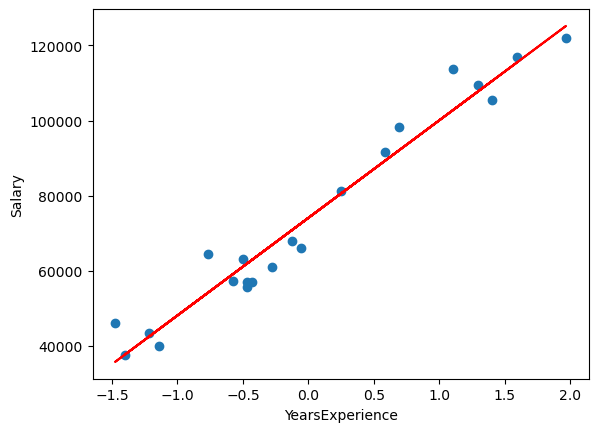

In [29]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [30]:
y_pred_test=regressor.predict(x_test)

In [31]:
y_pred_test

array([[ 33828.70479973],
       [123266.68448585],
       [116461.62081408],
       [ 52299.59190882],
       [ 74659.08683035],
       [ 81464.15050212],
       [ 54243.89581504],
       [ 51327.43995571],
       [ 99935.03761121]])

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

40485121.43858278
5095.488652996801
6362.791953111682


In [34]:
from sklearn.metrics import r2_score

In [35]:
score=r2_score(y_test,y_pred_test)
score

0.9461285518454469

In [36]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9384326306805107